In [3]:
#just load and import our need library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# DATA LOAD  - BIGMART INTO DATAFRAME

In [4]:
# Load / Read the data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
#understaing the our dataset, remove unwanted columns 
train1 = train.drop(['Item_Identifier','Outlet_Identifier'], axis = 'columns')
test1 = test.drop(['Item_Identifier','Outlet_Identifier'], axis = 'columns')
train1.shape,test1.shape

((8523, 10), (5681, 9))

# Data Cleaning - Handle Null values

In [6]:
#find missing values
train1.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test1.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
#Item weight and Outlet_size have huge missing values
#Try mean  on Item_Weight 
mean_value = train1['Item_Weight'].mean()
mean_value_test = test1['Item_Weight'].mean()
train1['Item_Weight'].fillna(mean_value, inplace = True)
test1['Item_Weight'].fillna(mean_value_test, inplace = True)

In [9]:
#the weight feature now null 
df = train1.copy()
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
dt = test1.copy()
dt.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
 # Calculate mode of 'Outlet_Size'
mode_value = df['Outlet_Size'].mode()[0] 
df['Outlet_Size'].fillna(mode_value, inplace=True)
mode_value = dt['Outlet_Size'].mode()[0] 
dt['Outlet_Size'].fillna(mode_value, inplace=True)

In [12]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
dt.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

 # Detect and Removen Outliners

In [14]:
df['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

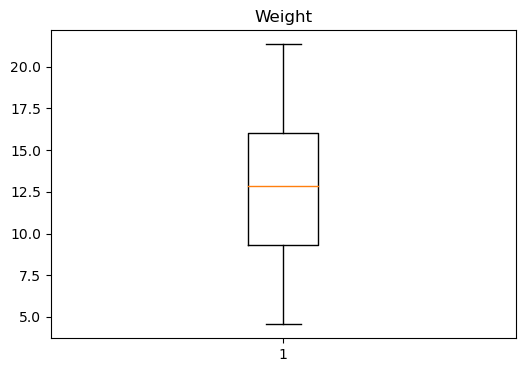

In [15]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Item_Weight'])
plt.title('Weight')
plt.show()

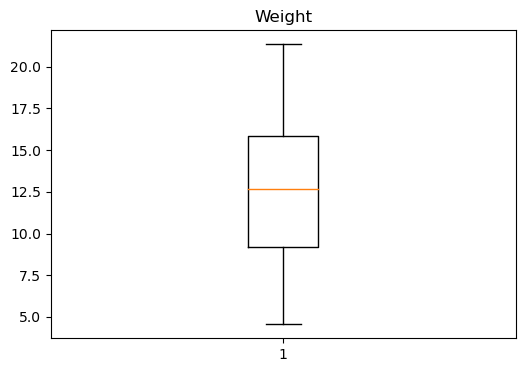

In [16]:
plt.figure(figsize=(6, 4))
plt.boxplot(dt['Item_Weight'])
plt.title('Weight')
plt.show()

In [17]:
Q1 = df['Item_Weight'].quantile(0.20)
Q3 = df['Item_Weight'].quantile(0.80)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5* IQR
df1 = df[(df.Item_Weight>lower)&(df.Item_Weight<Upper)]
df1.shape

(8523, 10)

In [18]:
Q1 = dt['Item_Weight'].quantile(0.20)
Q3 = dt['Item_Weight'].quantile(0.80)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5* IQR
dt1 = dt[(dt.Item_Weight>lower)&(dt.Item_Weight<Upper)]
dt1.shape

(5681, 9)

In [19]:
# Now in MRP features to detect the outliners
df1['Item_MRP'].describe(), dt1['Item_MRP'].describe()

(count    8523.000000
 mean      140.992782
 std        62.275067
 min        31.290000
 25%        93.826500
 50%       143.012800
 75%       185.643700
 max       266.888400
 Name: Item_MRP, dtype: float64,
 count    5681.000000
 mean      141.023273
 std        61.809091
 min        31.990000
 25%        94.412000
 50%       141.415400
 75%       186.026600
 max       266.588400
 Name: Item_MRP, dtype: float64)

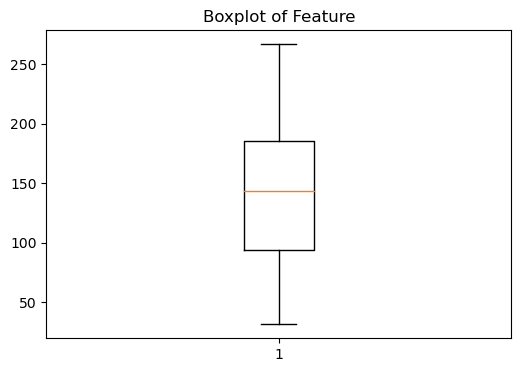

In [20]:
plt.figure(figsize=(6, 4))
plt.boxplot(df1['Item_MRP'])
plt.title('Boxplot of Feature')
plt.show()

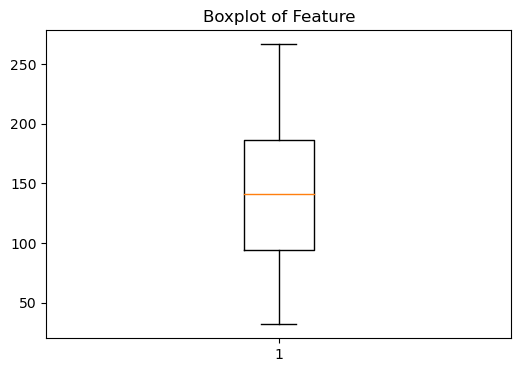

In [21]:
plt.figure(figsize=(6, 4))
plt.boxplot(dt1['Item_MRP'])
plt.title('Boxplot of Feature')
plt.show()

In [22]:
q1 = df1['Item_MRP'].quantile(0.20)
q3 = df1['Item_MRP'].quantile(0.80)
IQR = q3-q1
lower_limit = q1 - 1.5*IQR
Upper_limit = q3 + 1.5* IQR
df2 = df1[(df1.Item_Weight >lower_limit)&(df1.Item_Weight<Upper_limit)]
df2.shape

(8523, 10)

In [23]:
q1 = dt1['Item_MRP'].quantile(0.20)
q3 = dt1['Item_MRP'].quantile(0.80)
IQR = q3-q1
lower_limit = q1 - 1.5*IQR
Upper_limit = q3 + 1.5* IQR
dt2 = dt1[(dt1.Item_Weight >lower_limit)&(dt1.Item_Weight<Upper_limit)]
dt2.shape

(5681, 9)

# Feature Engineering

In [24]:
df2['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [25]:
dt2['Item_Visibility'].describe()

count    5681.000000
mean        0.065684
std         0.051252
min         0.000000
25%         0.027047
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

In [26]:
df_2 = df2[df2['Item_Visibility'] != 0]
df_2.shape

(7997, 10)

In [27]:
dt_2 = dt[dt2['Item_Visibility'] != 0]
dt_2.shape

(5328, 9)

In [28]:
#Make sure the visibility will be an better numerical value
df_2['Visibility']=df_2['Item_Visibility'] * 100
df_2['Visibility'].head()

C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\3922312031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Visibility']=df_2['Item_Visibility'] * 100


0     1.604730
1     1.927822
2     1.676007
6     1.274109
7    12.746986
Name: Visibility, dtype: float64

In [29]:
dt_2['Visibility']=dt_2['Item_Visibility'] * 100
dt_2['Visibility'].head()

C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\1483039020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_2['Visibility']=dt_2['Item_Visibility'] * 100


0     0.756484
1     3.842768
2     9.957491
3     1.538839
4    11.859931
Name: Visibility, dtype: float64

In [30]:
df_2.shape

(7997, 11)

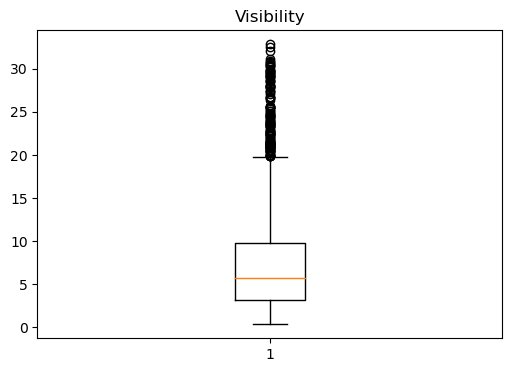

In [31]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_2['Visibility'])
plt.title('Visibility')
plt.show()

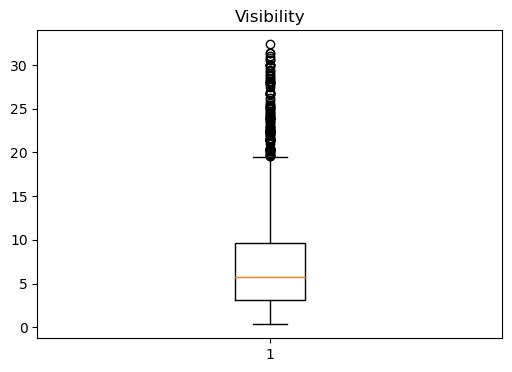

In [32]:
plt.figure(figsize=(6, 4))
plt.boxplot(dt_2['Visibility'])
plt.title('Visibility')
plt.show()

In [33]:
A1 = df_2['Visibility'].quantile(0.30)
A3 = df_2['Visibility'].quantile(0.70)
A1,A3

(3.6033138599999996, 8.81989582)

In [34]:
IQR = A3-A1
lower_limits = A1 - 1.5*IQR
Upper_limits = A3 + 1.5* IQR

In [35]:
df3 = df_2[(df_2.Visibility>lower_limits)& (df_2.Visibility<Upper_limits)]
df3.shape

(7596, 11)

In [36]:
A1 = dt_2['Visibility'].quantile(0.30)
A3 = dt_2['Visibility'].quantile(0.70)
A1,A3

(3.62944132, 8.75640335)

In [37]:
IQR = A3-A1
lower_limits = A1 - 1.5*IQR
Upper_limits = A3 + 1.5* IQR
dt3 = dt_2[(dt_2.Visibility>lower_limits)& (dt_2.Visibility<Upper_limits)]
dt3.shape

(5052, 10)

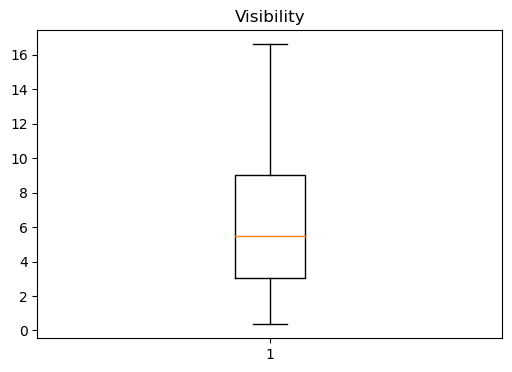

In [38]:
plt.figure(figsize=(6, 4))
plt.boxplot(df3['Visibility'])
plt.title('Visibility')
plt.show()

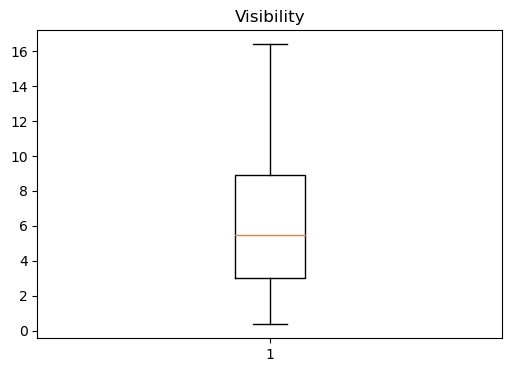

In [39]:
plt.figure(figsize=(6, 4))
plt.boxplot(dt3['Visibility'])
plt.title('Visibility')
plt.show()

In [40]:
def find_unique(df):
        for column in df3:
            if df3[column].dtype=='object':
                print(f'{column} : {df3[column].unique()}')

In [41]:
find_unique(df3)

Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Snack Foods' 'Frozen Foods'
 'Fruits and Vegetables' 'Breakfast' 'Health and Hygiene' 'Hard Drinks'
 'Baking Goods' 'Household' 'Canned' 'Breads' 'Starchy Foods' 'Others'
 'Seafood']
Outlet_Size : ['Medium' 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Supermarket Type3'
 'Grocery Store']


In [42]:
find_unique(dt3)

Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Snack Foods' 'Frozen Foods'
 'Fruits and Vegetables' 'Breakfast' 'Health and Hygiene' 'Hard Drinks'
 'Baking Goods' 'Household' 'Canned' 'Breads' 'Starchy Foods' 'Others'
 'Seafood']
Outlet_Size : ['Medium' 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Supermarket Type3'
 'Grocery Store']


In [43]:
# In item_fat content - low fat and regular fat are only two section.
df3['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)
dt3['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)

C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\2091229356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)
C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\2091229356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt3['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)


In [44]:
find_unique(df3)

Item_Fat_Content : ['Low Fat' 'Regular']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Snack Foods' 'Frozen Foods'
 'Fruits and Vegetables' 'Breakfast' 'Health and Hygiene' 'Hard Drinks'
 'Baking Goods' 'Household' 'Canned' 'Breads' 'Starchy Foods' 'Others'
 'Seafood']
Outlet_Size : ['Medium' 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Supermarket Type3'
 'Grocery Store']


In [45]:
find_unique(dt3)

Item_Fat_Content : ['Low Fat' 'Regular']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Snack Foods' 'Frozen Foods'
 'Fruits and Vegetables' 'Breakfast' 'Health and Hygiene' 'Hard Drinks'
 'Baking Goods' 'Household' 'Canned' 'Breads' 'Starchy Foods' 'Others'
 'Seafood']
Outlet_Size : ['Medium' 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Supermarket Type3'
 'Grocery Store']


In [46]:
df3.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility
0,9.300000,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.604730
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.927822
2,17.500000,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.676007
6,13.650000,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528,1.274109
7,12.857645,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636,12.746986


In [47]:
df3.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility
0,9.300000,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.604730
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.927822
2,17.500000,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.676007
6,13.650000,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528,1.274109
7,12.857645,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636,12.746986


In [48]:
#change into cateogrical into numerical Use label encoding and dummies
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df3['Fat'] = label_encoder.fit_transform(df3['Item_Fat_Content'])
df3['Size '] = label_encoder.fit_transform(df3['Outlet_Size'])
df3['type_tier'] = label_encoder.fit_transform(df3['Outlet_Location_Type'])
df3['type_super'] = label_encoder.fit_transform(df3['Outlet_Type'])
dt3['Fat'] = label_encoder.fit_transform(dt3['Item_Fat_Content'])
dt3['Size '] = label_encoder.fit_transform(dt3['Outlet_Size'])
dt3['type_tier'] = label_encoder.fit_transform(dt3['Outlet_Location_Type'])
dt3['type_super'] = label_encoder.fit_transform(dt3['Outlet_Type'])


C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\2232418794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Fat'] = label_encoder.fit_transform(df3['Item_Fat_Content'])
C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\2232418794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Size '] = label_encoder.fit_transform(df3['Outlet_Size'])
C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\2232418794.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [49]:
df3.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility,Fat,Size,type_tier,type_super
0,9.300000,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.604730,0,1,0,1
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.927822,1,1,2,2
2,17.500000,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.676007,0,1,0,1
6,13.650000,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528,1.274109,1,0,2,1
7,12.857645,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636,12.746986,0,1,2,3


In [50]:
df4 = df3.drop(['Item_Fat_Content','Item_Visibility','Outlet_Size','Outlet_Type','Outlet_Location_Type'], axis='columns')
dt4 = dt3.drop(['Item_Fat_Content','Item_Visibility','Outlet_Size','Outlet_Type','Outlet_Location_Type'], axis='columns')
df4.head()

,Item_Weight,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Visibility,Fat,Size,type_tier,type_super
0,9.300000,Dairy,249.8092,1999,3735.1380,1.604730,0,1,0,1
1,5.920000,Soft Drinks,48.2692,2009,443.4228,1.927822,1,1,2,2
2,17.500000,Meat,141.6180,1999,2097.2700,1.676007,0,1,0,1
6,13.650000,Snack Foods,57.6588,1987,343.5528,1.274109,1,0,2,1
7,12.857645,Snack Foods,107.7622,1985,4022.7636,12.746986,0,1,2,3


In [51]:
df4['Item_Type'].value_counts(ascending=False), dt4['Item_Type'].value_counts(ascending=False)

(Snack Foods              1082
 Fruits and Vegetables    1079
 Household                 807
 Frozen Foods              784
 Dairy                     601
 Canned                    582
 Baking Goods              563
 Health and Hygiene        475
 Meat                      385
 Soft Drinks               384
 Breads                    225
 Hard Drinks               190
 Others                    151
 Starchy Foods             128
 Breakfast                 103
 Seafood                    57
 Name: Item_Type, dtype: int64,
 Snack Foods              705
 Fruits and Vegetables    691
 Household                580
 Frozen Foods             500
 Dairy                    397
 Baking Goods             391
 Canned                   383
 Health and Hygiene       303
 Meat                     270
 Soft Drinks              245
 Breads                   150
 Hard Drinks              134
 Starchy Foods            113
 Others                    96
 Breakfast                 69
 Seafood              

In [52]:
dummies = pd.get_dummies(df4['Item_Type'])
dummies_t = pd.get_dummies(dt4['Item_Type'])

In [53]:
df_4 = pd.concat([dummies,df4], axis = 'columns')

In [54]:
dt_4 = pd.concat([dummies_t,dt4], axis = 'columns')

In [55]:
df_4.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,Item_Weight,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Visibility,Fat,Size,type_tier,type_super
0,0,0,0,0,1,0,0,0,0,0,...,9.300000,Dairy,249.8092,1999,3735.1380,1.604730,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,5.920000,Soft Drinks,48.2692,2009,443.4228,1.927822,1,1,2,2
2,0,0,0,0,0,0,0,0,0,0,...,17.500000,Meat,141.6180,1999,2097.2700,1.676007,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,...,13.650000,Snack Foods,57.6588,1987,343.5528,1.274109,1,0,2,1
7,0,0,0,0,0,0,0,0,0,0,...,12.857645,Snack Foods,107.7622,1985,4022.7636,12.746986,0,1,2,3


In [56]:
df5 = df_4.drop(['Item_Type'], axis = 'columns')
dt5 = dt_4.drop(['Item_Type'], axis = 'columns')
df5.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,Starchy Foods,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Visibility,Fat,Size,type_tier,type_super
0,0,0,0,0,1,0,0,0,0,0,...,0,9.300000,249.8092,1999,3735.1380,1.604730,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,5.920000,48.2692,2009,443.4228,1.927822,1,1,2,2
2,0,0,0,0,0,0,0,0,0,0,...,0,17.500000,141.6180,1999,2097.2700,1.676007,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,13.650000,57.6588,1987,343.5528,1.274109,1,0,2,1
7,0,0,0,0,0,0,0,0,0,0,...,0,12.857645,107.7622,1985,4022.7636,12.746986,0,1,2,3


In [57]:
def custom_round(value):
    return int(value + 0.5) if value - int(value) >= 0.5 else int(value)

# Apply the custom rounding function to the Series
rounded_series = df5['Item_MRP'].apply(lambda x: custom_round(x))
rounded_value = df5['Visibility'].apply(lambda x : custom_round(x))
rounded_ser = dt5['Item_MRP'].apply(lambda x: custom_round(x))
rounded_va = dt5['Visibility'].apply(lambda x : custom_round(x))

print(rounded_series, rounded_value)

0       250
1        48
2       142
6        58
7       108
       ... 
8518    215
8519    108
8520     85
8521    103
8522     75
Name: Item_MRP, Length: 7596, dtype: int64 0        2
1        2
2        2
6        1
7       13
        ..
8518     6
8519     5
8520     4
8521    15
8522     4
Name: Visibility, Length: 7596, dtype: int64


In [58]:
df5.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,Starchy Foods,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Visibility,Fat,Size,type_tier,type_super
0,0,0,0,0,1,0,0,0,0,0,...,0,9.300000,249.8092,1999,3735.1380,1.604730,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,5.920000,48.2692,2009,443.4228,1.927822,1,1,2,2
2,0,0,0,0,0,0,0,0,0,0,...,0,17.500000,141.6180,1999,2097.2700,1.676007,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,13.650000,57.6588,1987,343.5528,1.274109,1,0,2,1
7,0,0,0,0,0,0,0,0,0,0,...,0,12.857645,107.7622,1985,4022.7636,12.746986,0,1,2,3


In [59]:
d = df5.drop(['Item_MRP'], axis = 'columns')
d.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,Soft Drinks,Starchy Foods,Item_Weight,Outlet_Establishment_Year,Item_Outlet_Sales,Visibility,Fat,Size,type_tier,type_super
0,0,0,0,0,1,0,0,0,0,0,...,0,0,9.300000,1999,3735.1380,1.604730,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,5.920000,2009,443.4228,1.927822,1,1,2,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,17.500000,1999,2097.2700,1.676007,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,13.650000,1987,343.5528,1.274109,1,0,2,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,12.857645,1985,4022.7636,12.746986,0,1,2,3


In [60]:
t = dt5.drop(['Item_MRP'], axis = 'columns')
t.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,Snack Foods,Soft Drinks,Starchy Foods,Item_Weight,Outlet_Establishment_Year,Visibility,Fat,Size,type_tier,type_super
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,20.750000,1999,0.756484,0,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,8.300000,2007,3.842768,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,14.600000,1998,9.957491,0,1,2,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,7.315000,2007,1.538839,0,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,12.695633,1985,11.859931,1,1,2,3


In [61]:
df6 = pd.concat([d,rounded_series], axis = 'columns')
dt6= pd.concat([t,rounded_ser], axis = 'columns')

In [62]:
df6.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,Starchy Foods,Item_Weight,Outlet_Establishment_Year,Item_Outlet_Sales,Visibility,Fat,Size,type_tier,type_super,Item_MRP
0,0,0,0,0,1,0,0,0,0,0,...,0,9.300000,1999,3735.1380,1.604730,0,1,0,1,250
1,0,0,0,0,0,0,0,0,0,0,...,0,5.920000,2009,443.4228,1.927822,1,1,2,2,48
2,0,0,0,0,0,0,0,0,0,0,...,0,17.500000,1999,2097.2700,1.676007,0,1,0,1,142
6,0,0,0,0,0,0,0,0,0,0,...,0,13.650000,1987,343.5528,1.274109,1,0,2,1,58
7,0,0,0,0,0,0,0,0,0,0,...,0,12.857645,1985,4022.7636,12.746986,0,1,2,3,108


In [63]:
dt6.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,Soft Drinks,Starchy Foods,Item_Weight,Outlet_Establishment_Year,Visibility,Fat,Size,type_tier,type_super,Item_MRP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,20.750000,1999,0.756484,0,1,0,1,108
1,0,0,0,0,1,0,0,0,0,0,...,0,0,8.300000,2007,3.842768,1,1,1,1,87
2,0,0,0,0,0,0,0,0,0,0,...,0,0,14.600000,1998,9.957491,0,1,2,0,242
3,0,0,0,0,0,0,0,0,0,0,...,0,0,7.315000,2007,1.538839,0,1,1,1,155
4,0,0,0,0,1,0,0,0,0,0,...,0,0,12.695633,1985,11.859931,1,1,2,3,234


# Model to train

In [64]:
x = df6.drop(['Item_Outlet_Sales','Seafood'], axis = 'columns')
x.shape

(7596, 23)

In [65]:
y = df5['Item_Outlet_Sales']
y.head()

0    3735.1380
1     443.4228
2    2097.2700
6     343.5528
7    4022.7636
Name: Item_Outlet_Sales, dtype: float64

In [66]:
z = dt6.drop(['Seafood'], axis = 'columns')
z.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,Soft Drinks,Starchy Foods,Item_Weight,Outlet_Establishment_Year,Visibility,Fat,Size,type_tier,type_super,Item_MRP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,20.750000,1999,0.756484,0,1,0,1,108
1,0,0,0,0,1,0,0,0,0,0,...,0,0,8.300000,2007,3.842768,1,1,1,1,87
2,0,0,0,0,0,0,0,0,0,0,...,0,0,14.600000,1998,9.957491,0,1,2,0,242
3,0,0,0,0,0,0,0,0,0,0,...,0,0,7.315000,2007,1.538839,0,1,1,1,155
4,0,0,0,0,1,0,0,0,0,0,...,0,0,12.695633,1985,11.859931,1,1,2,3,234


# Make an Standardize 

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)

In [68]:
z_scale = scaler.fit_transform(z)

In [69]:
x_scale

array([[0.        , 0.        , 0.        , ..., 0.        , 0.33333333,
        0.9279661 ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.66666667,
        0.0720339 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33333333,
        0.47033898],
       ...,
       [0.        , 0.        , 0.        , ..., 0.5       , 0.33333333,
        0.22881356],
       [0.        , 0.        , 0.        , ..., 1.        , 0.66666667,
        0.30508475],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33333333,
        0.18644068]])

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale,y,test_size=0.2,random_state=1000)

In [71]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators= 1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5504620193484864

In [86]:
pre = model.predict(z_scale)
pre

array([1807.4279518, 1078.6213004,  621.0755508, ..., 3278.7667216,
       1994.3819286, 1544.915662 ])

In [72]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.5259194466297314

# Get an Best model using Grid  

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)


C:\Users\Mowli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mowli\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mowli\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Mowli\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Mowli\anaconda3\lib\site-packag

,model,best_score,best_params
0,linear_regression,0.503630,{'fit_intercept': False}
1,lasso,0.505299,"{'alpha': 2, 'selection': 'random'}"
2,random_forest,0.578316,"{'criterion': 'friedman_mse', 'max_depth': Non..."


# My best model with score is random_forest with 0.578

# Evaluate the model

In [206]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [207]:
mse,rmse,mae,r2

(1298632.1783823413, 1139.5754377759908, 800.7774925174997, 0.5504620193484864)

# Visualization of our data

In [102]:
df3['Item_Type'] = df3['Item_Type'].astype('category')
df3['Item_Fat_Content'] = df3['Item_Fat_Content'].astype('category')

C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\672600278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Item_Type'] = df3['Item_Type'].astype('category')
C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\672600278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Item_Fat_Content'] = df3['Item_Fat_Content'].astype('category')


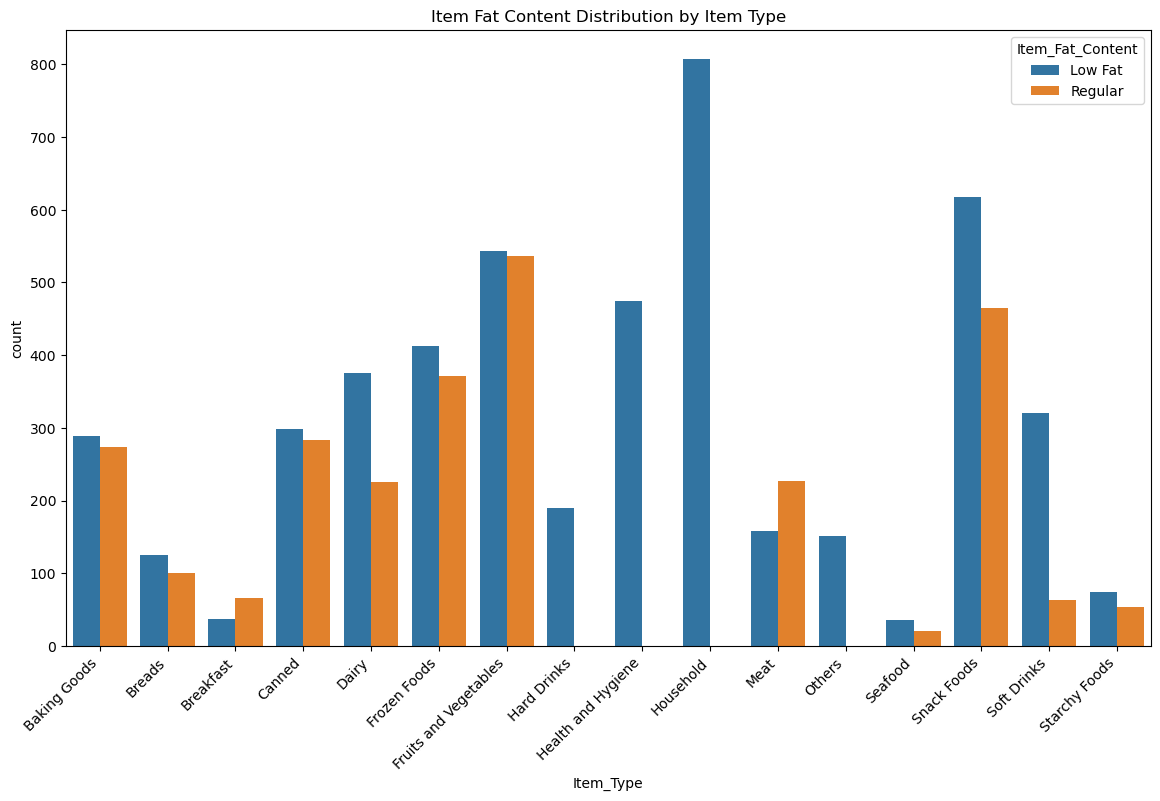

In [104]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Item_Type', hue='Item_Fat_Content', data=df3)
plt.xticks(rotation=45, ha='right')
plt.title('Item Fat Content Distribution by Item Type')
plt.show()

In [114]:
df3['Item_Type'] = df3['Item_Type'].astype('category')
df3['Outlet_Size'] = df3['Outlet_Size'].astype('category')
df3['Otlet_Location_Type'] = df3['Outlet_Location_Type'].astype('category')
df3['Outlet_Type'] = df3['Outlet_Type'].astype('category')


C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\7922392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Item_Type'] = df3['Item_Type'].astype('category')
C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\7922392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Outlet_Size'] = df3['Outlet_Size'].astype('category')
C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\7922392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [117]:
df3['Item_Outlet_Sales'] = df3['Item_Outlet_Sales'].astype(float)

C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\3498639615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Item_Outlet_Sales'] = df3['Item_Outlet_Sales'].astype(float)


Text(0, 0.5, 'Count')

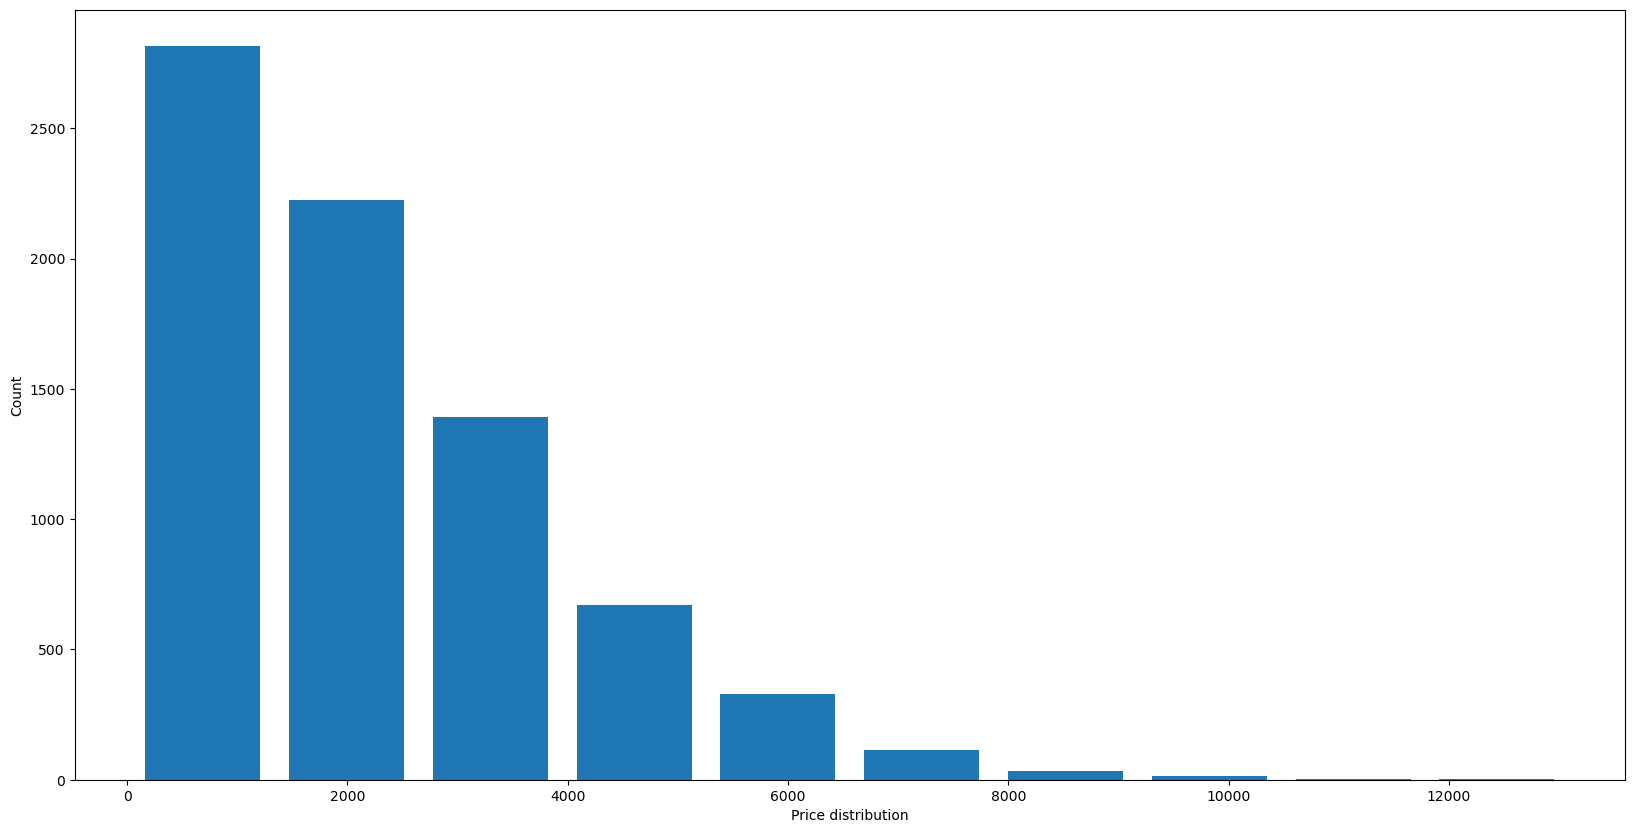

In [176]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df3.Item_Outlet_Sales, rwidth = 0.8)
plt.xlabel("Price distribution")
plt.ylabel("Count") #Given plot says our sales high in below 4k

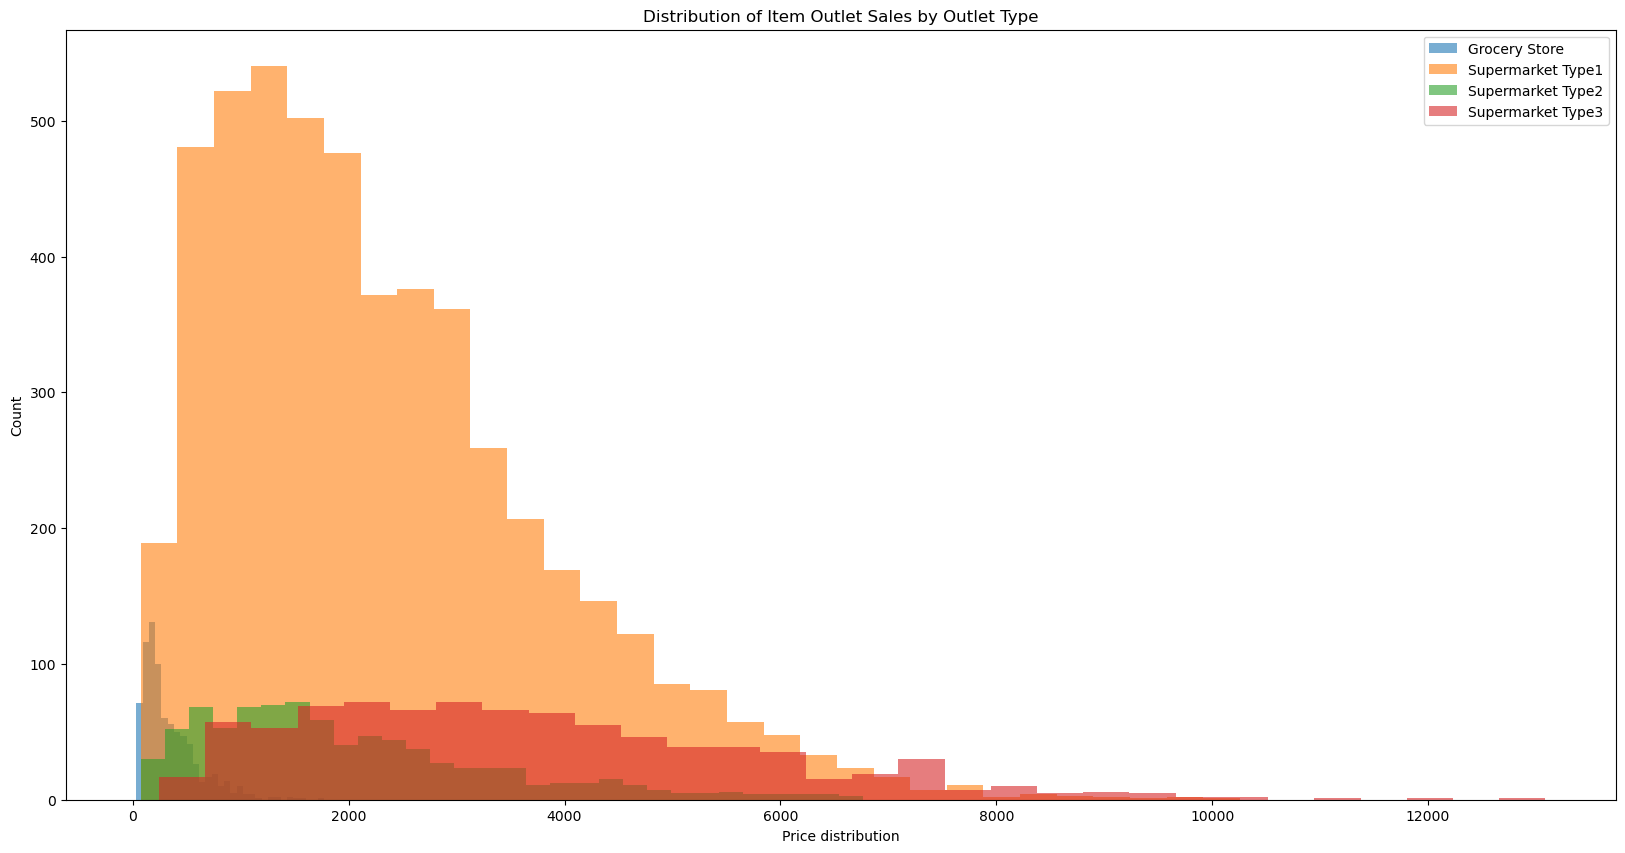

In [177]:
plt.figure(figsize=(20, 10))
for outlet_type, data in df3.groupby('Outlet_Type'):
    plt.hist(data['Item_Outlet_Sales'], label=outlet_type, alpha=0.6, bins=30)
    
plt.xlabel("Price distribution")
plt.ylabel("Count")
plt.title("Distribution of Item Outlet Sales by Outlet Type")
plt.legend()
plt.show() #Our supermarket type1 as huge impact on our sales 

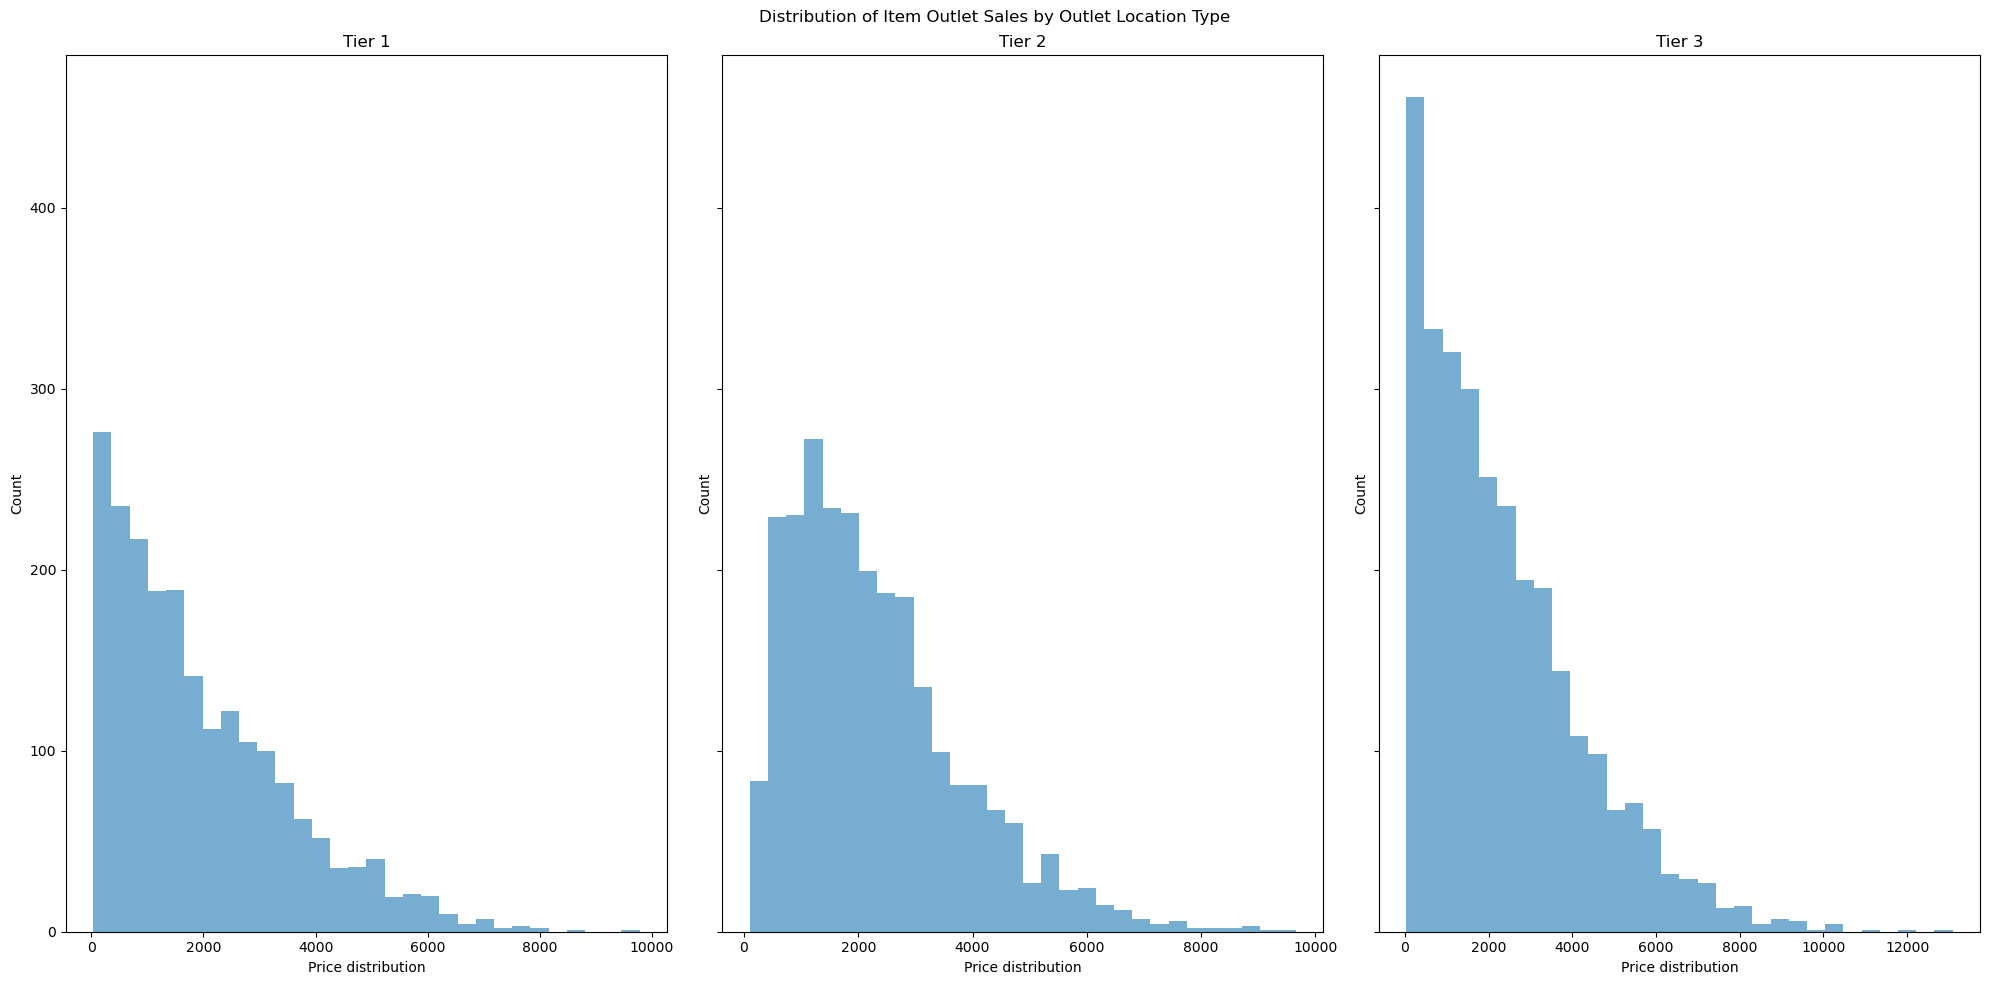

In [180]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=len(df3['Outlet_Location_Type'].unique()), sharey=True)


for idx, (outlet_type, data) in enumerate(df3.groupby('Outlet_Location_Type')):
    ax = axs[idx] if len(df3['Outlet_Location_Type'].unique()) > 1 else axs  
    ax.hist(data['Item_Outlet_Sales'], alpha=0.6, bins=30)
    ax.set_title(outlet_type)
    ax.set_xlabel("Price distribution")
    ax.set_ylabel("Count")
    
plt.suptitle("Distribution of Item Outlet Sales by Outlet Location Type")
plt.tight_layout()
plt.show()

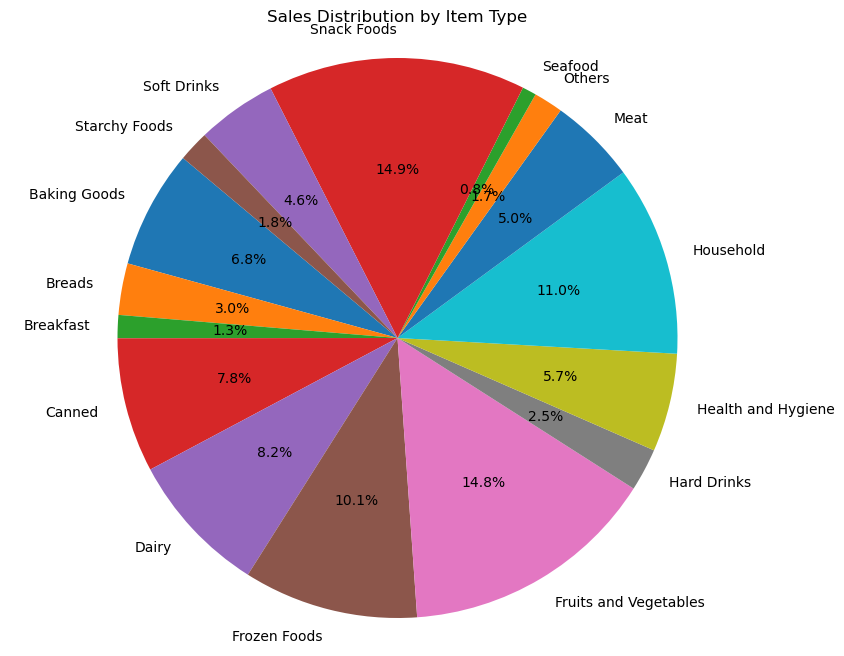

In [181]:
sales_by_item_type = df3.groupby('Item_Type')['Item_Outlet_Sales'].sum()


plt.figure(figsize=(10, 8))
plt.pie(sales_by_item_type, labels=sales_by_item_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Item Type')
plt.axis('equal')  
plt.show() #snacks and Fruits are high share for our sales

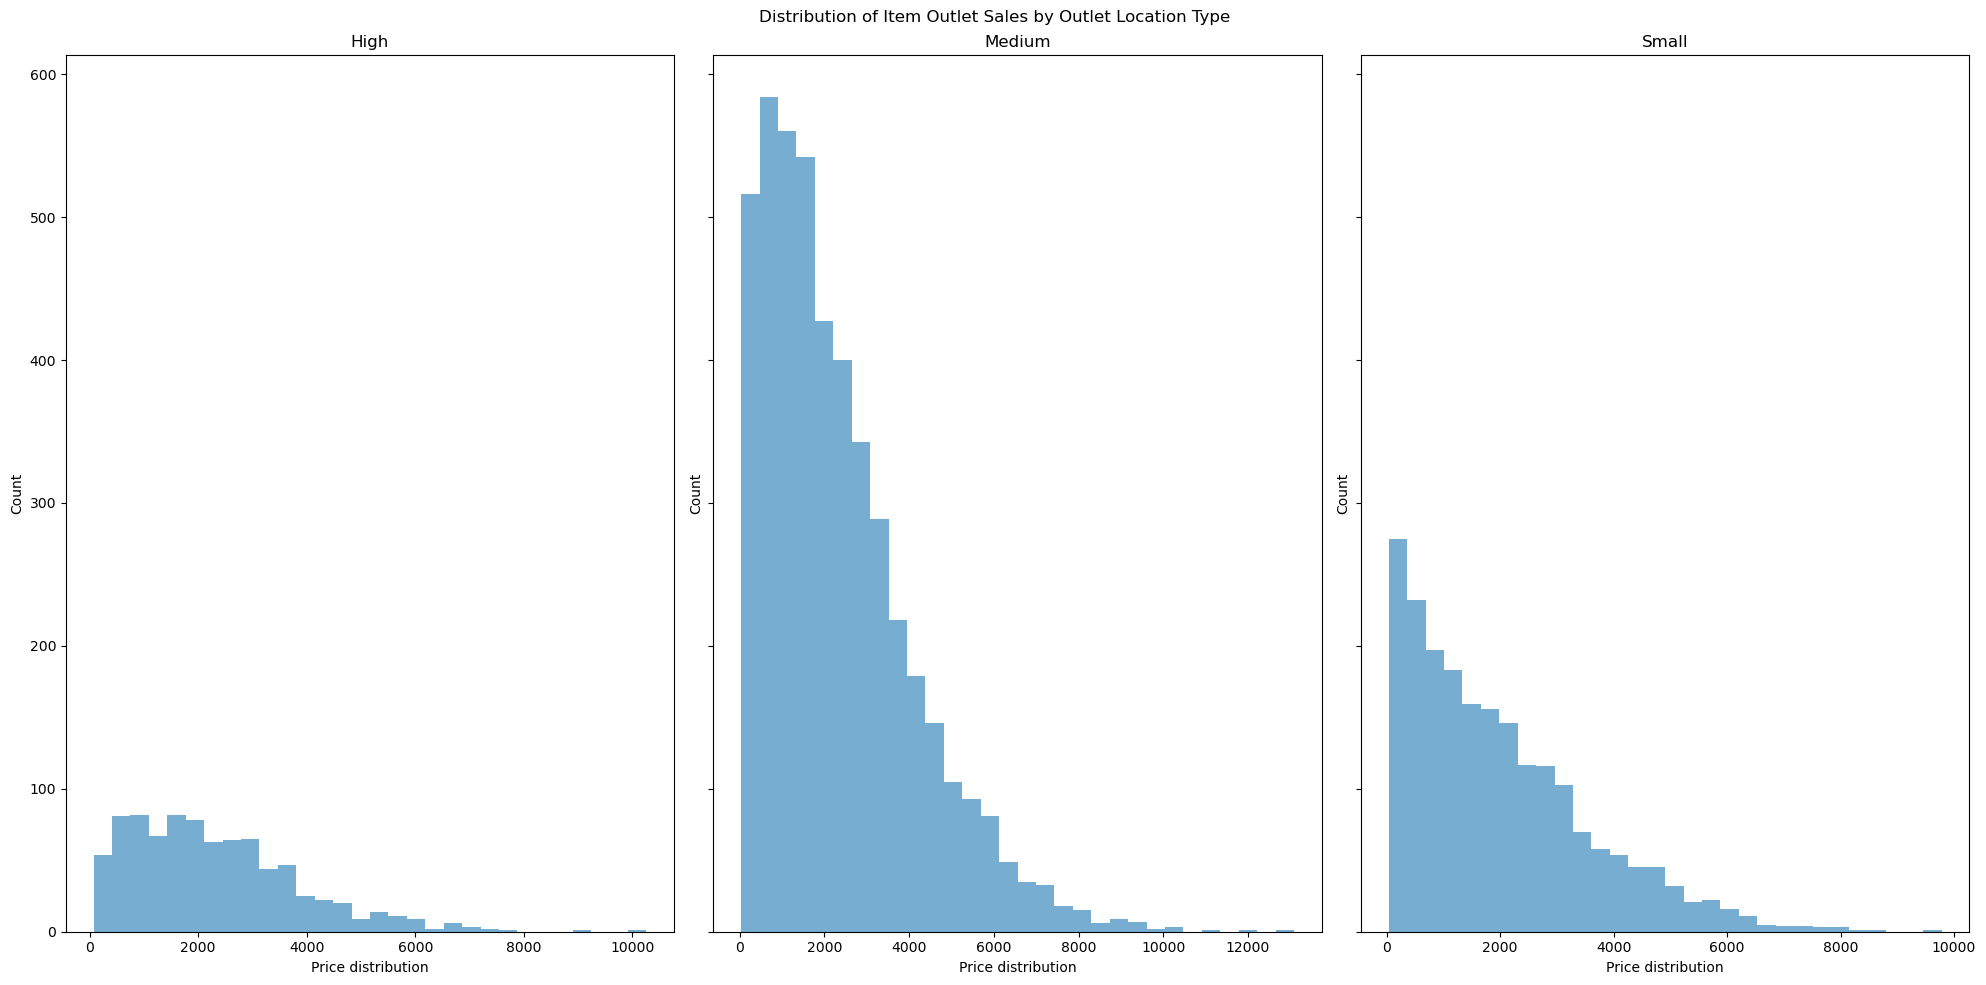

In [190]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=len(df3['Outlet_Size'].unique()), sharey=True)


for idx, (outlet_type, data) in enumerate(df3.groupby('Outlet_Size')):
    ax = axs[idx] if len(df3['Outlet_Location_Type'].unique()) > 1 else axs  
    ax.hist(data['Item_Outlet_Sales'], alpha=0.6, bins=30)
    ax.set_title(outlet_type)
    ax.set_xlabel("Price distribution")
    ax.set_ylabel("Count")
    
plt.suptitle("Distribution of Item Outlet Sales by Outlet Location Type")
plt.tight_layout()
plt.show() #our medium size products are so high margin

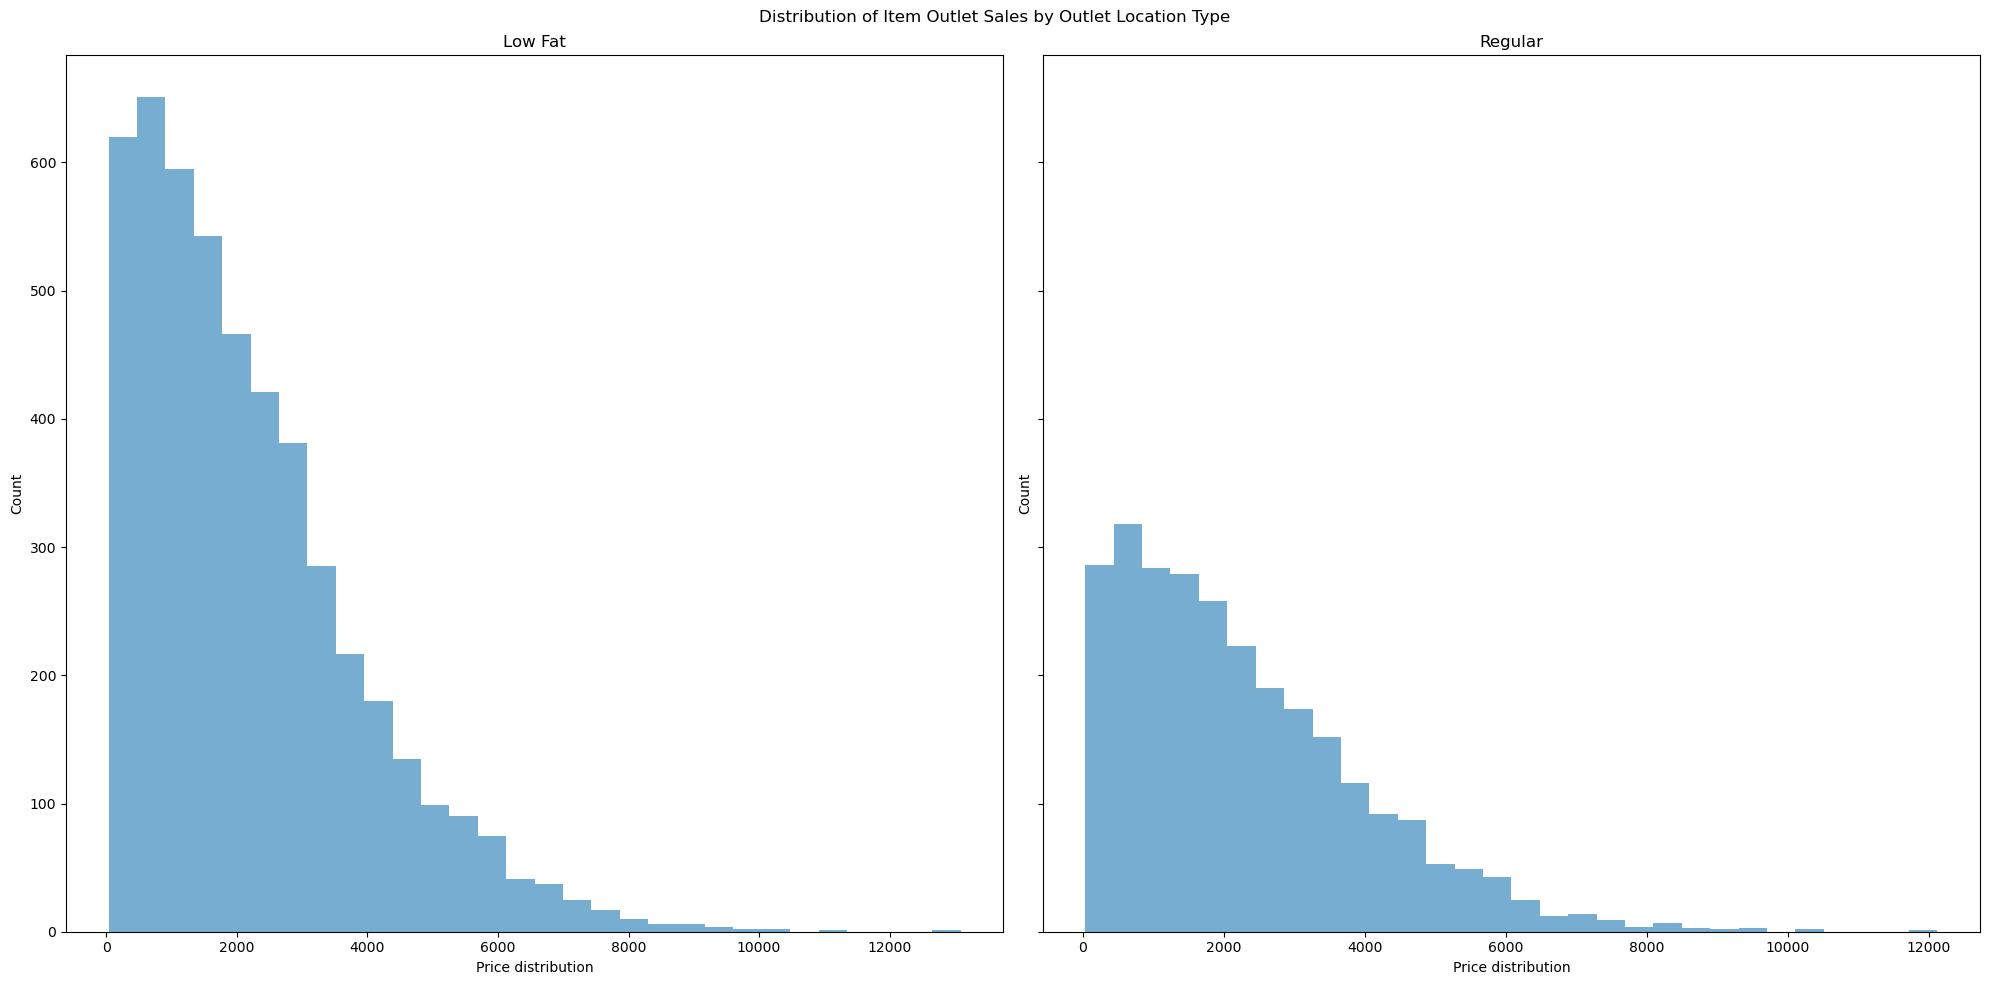

In [191]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=len(df3['Item_Fat_Content'].unique()), sharey=True)

for idx, (outlet_type, data) in enumerate(df3.groupby('Item_Fat_Content')):
    ax = axs[idx] if len(df3['Outlet_Location_Type'].unique()) > 1 else axs  
    ax.hist(data['Item_Outlet_Sales'], alpha=0.6, bins=30)
    ax.set_title(outlet_type)
    ax.set_xlabel("Price distribution")
    ax.set_ylabel("Count")
    
plt.suptitle("Distribution of Item Outlet Sales by Outlet Location Type")
plt.tight_layout()
plt.show() 

C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\1637404416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Item_Type'] = df3['Item_Type'].astype('category')
C:\Users\Mowli\AppData\Local\Temp\ipykernel_27468\1637404416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Item_Fat_Content'] = df3['Item_Fat_Content'].astype('category')


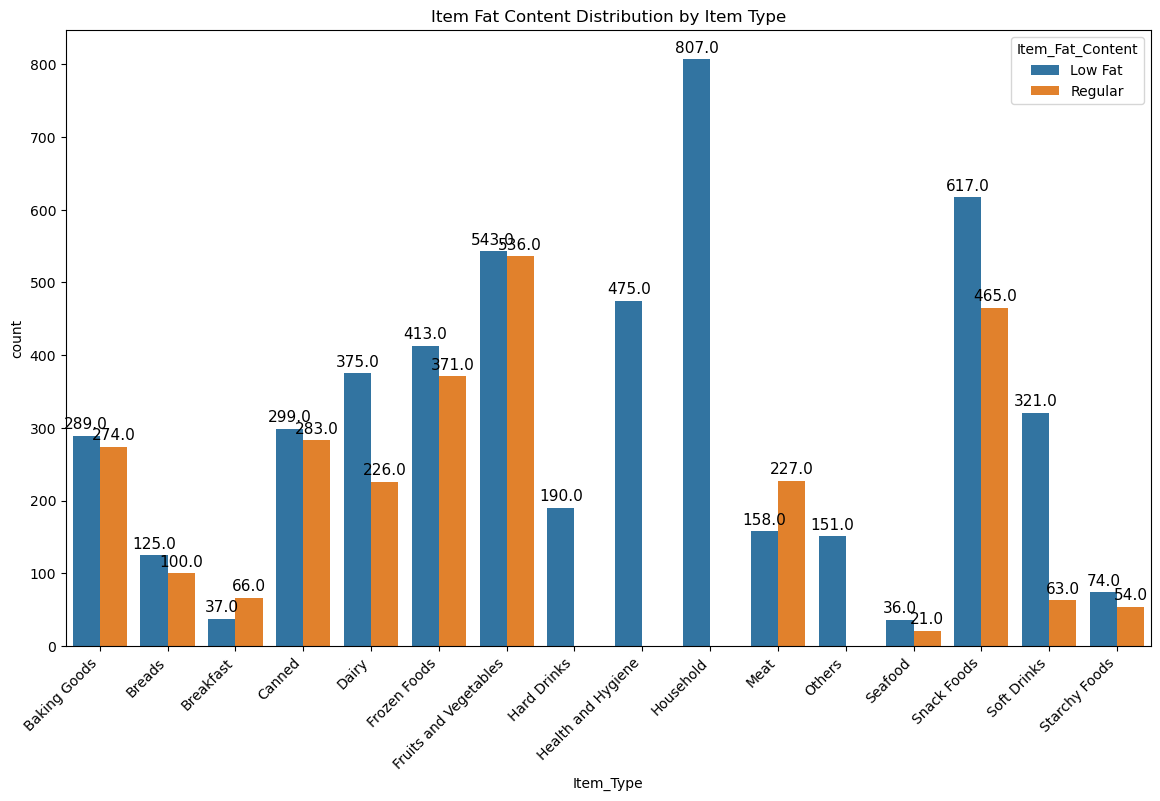

In [203]:
df3['Item_Type'] = df3['Item_Type'].astype('category')
df3['Item_Fat_Content'] = df3['Item_Fat_Content'].astype('category')

plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Item_Type', hue='Item_Fat_Content', data=df3)
plt.xticks(rotation=45, ha='right')
plt.title('Item Fat Content Distribution by Item Type')

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

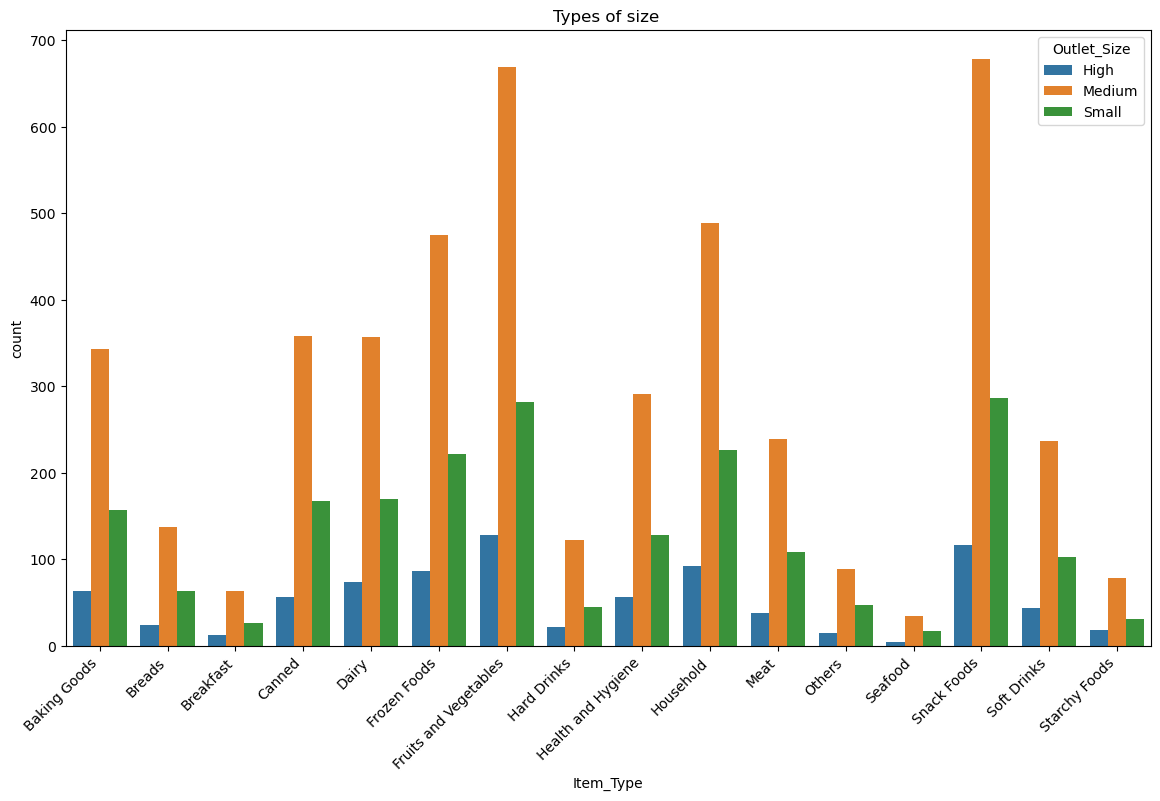

In [200]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Item_Type', hue='Outlet_Size', data=df3)
plt.xticks(rotation=45, ha='right')
plt.title('Types of size ')
plt.show()

In [208]:
import pickle
file_pathes = 'Saved_data.pikl'
with open(file_pathes, 'wb') as file:
    pickle.dump(df4, file)
    print("Data saved")

Data saved
